In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
    #CV LIBRARY FOR EQUALIZATION
    #equalized_image = cv2.equalizeHist(image)
    
    '''# Flatten the image to a 1D array
    img_flat = image.flatten()
    
    #NP LIBRARY FOR HISTOGRAM CALCULATION
    hist, bins = np.histogram(img_flat, bins=256, range=[0, 256])
    
    plt.figure(figsize=(10, 5))
    plt.title('Histogram of Grayscale Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.bar(bins[:-1], hist, width=1, edgecolor='black')  # bins[:-1] for the x-axis, hist for the height
    plt.show()
    '''

In [24]:
def compute_histogram(image):
    height, width = image.shape
    hist = np.zeros(256, dtype=int) #initialize hist array to store freq 
    for y in range(height):
        for x in range(width):
            pixel_value = image[y, x]
            hist[pixel_value] += 1
    return hist

In [25]:
def equalize_histogram(image):
    hist = compute_histogram(image)
    cdf = np.cumsum(hist)
    cdf_normalized = cdf * (255.0 / cdf[-1]) #normalize the scale the full range of intensities
    
    # Map the pixel values
    equalized_image = np.interp(image.flatten(), range(256), cdf_normalized) # maps the original pixel intensities to their new equalized values using the normalized cdf
    equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)
    
    return equalized_image

In [26]:
def plot_histogram(image, title):
    hist = compute_histogram(image)
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.bar(range(256), hist, width=1, edgecolor='black')
    plt.show()

In [27]:
def main(image_path, input):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError(f"Error loading image from path: {image_path}")
    plot_histogram(image, 'Original Histogram')
    equalized_image = equalize_histogram(image)
    plot_histogram(equalized_image, 'Equalized Histogram')

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Equalized Image')
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

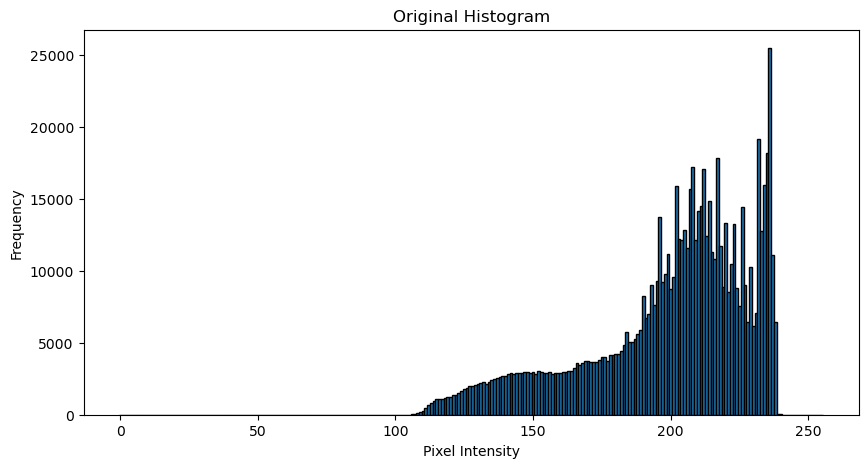

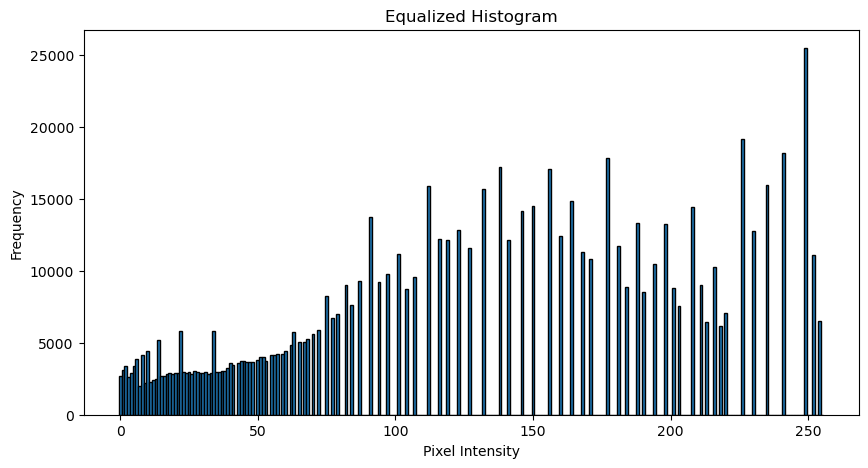

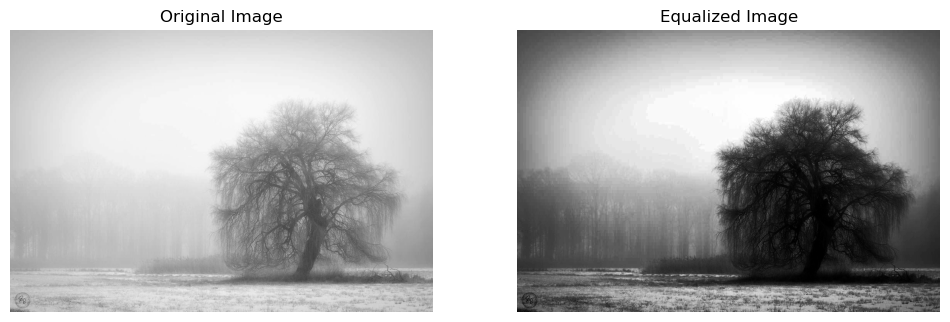

In [28]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\low_contarst.jpg"
main(image_path)

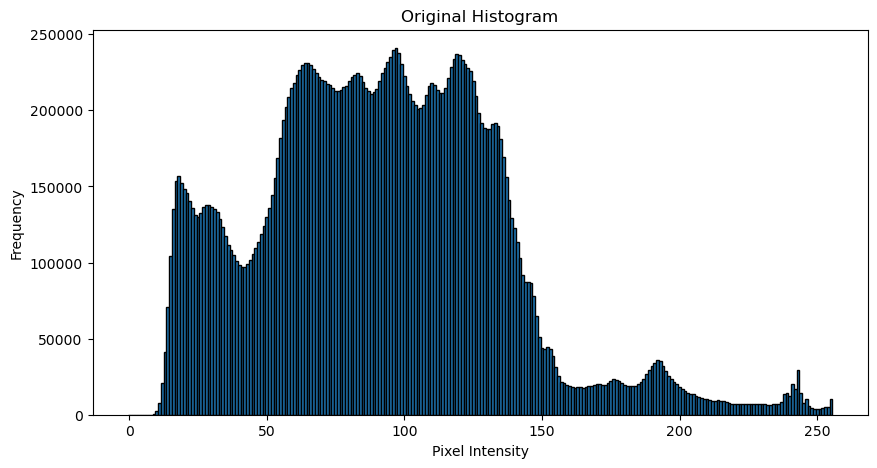

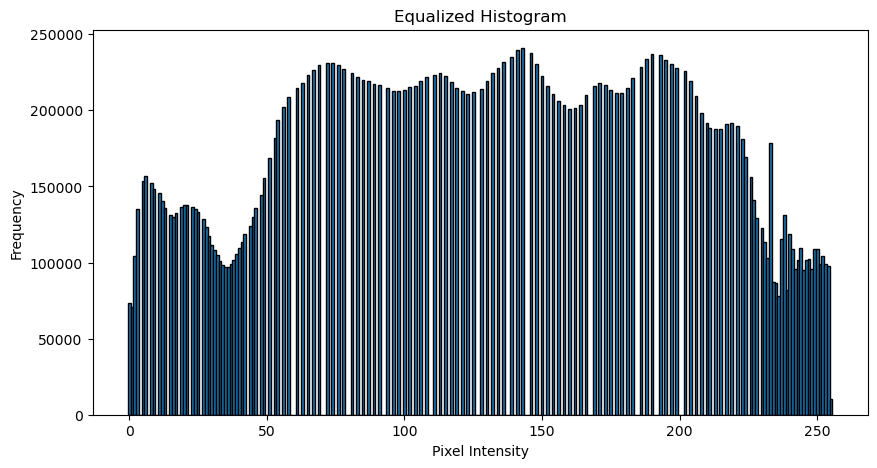

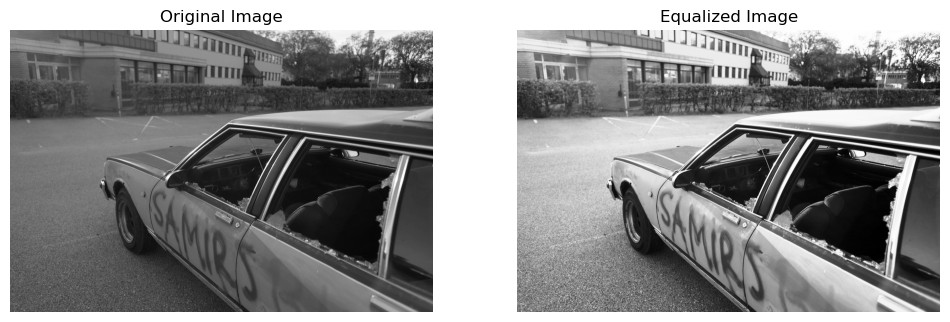

In [29]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\car.jpg"
main(image_path)